In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
#from modules import calc_spinylm as sylm
#from modules import local_eb_kernel as rko
from modules.backup_working_codes import euler as euler
from modules.backup_working_codes import rs_rad_ker as rk
from modules.backup_working_codes import  convert_qu2eb as qb
from modules.backup_working_codes import aliasing_correction as ac
from scipy.interpolate import interp1d


%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [30]:
nside=128 ; npix=h.nside2npix(nside)
sampling=4500
lmax=3*nside

pxsize=sqrt(4.*pi/h.nside2npix(nside))
beta0=min(180,180.*32/(3*nside))*pi/180. ; print beta0*180/pi

theta,pl2=rk.get_plm0(lmax,sampling,theta_max=3.*beta0)

15.0


In [31]:
tqu=h.read_map("../../data/planck353full_TQU_map_nside512.fits",(0,1,2))
tqu=h.ud_grade(tqu,nside)

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [191]:
theta_cutoff=4*pi/180.
apow=rk.fn_apodization(theta,theta_cutoff=theta_cutoff,apow_frac=0.5)
rad_ker=rk.calc_qu2eb_rad_ker(lmax,theta,pl2)# Default
#rad_ker=rk.mod_rad_ker(theta,shift=0.0,amp=2,width=0.015,slope=2.,expslope=2)# Modified

<IPython.core.display.Javascript object>


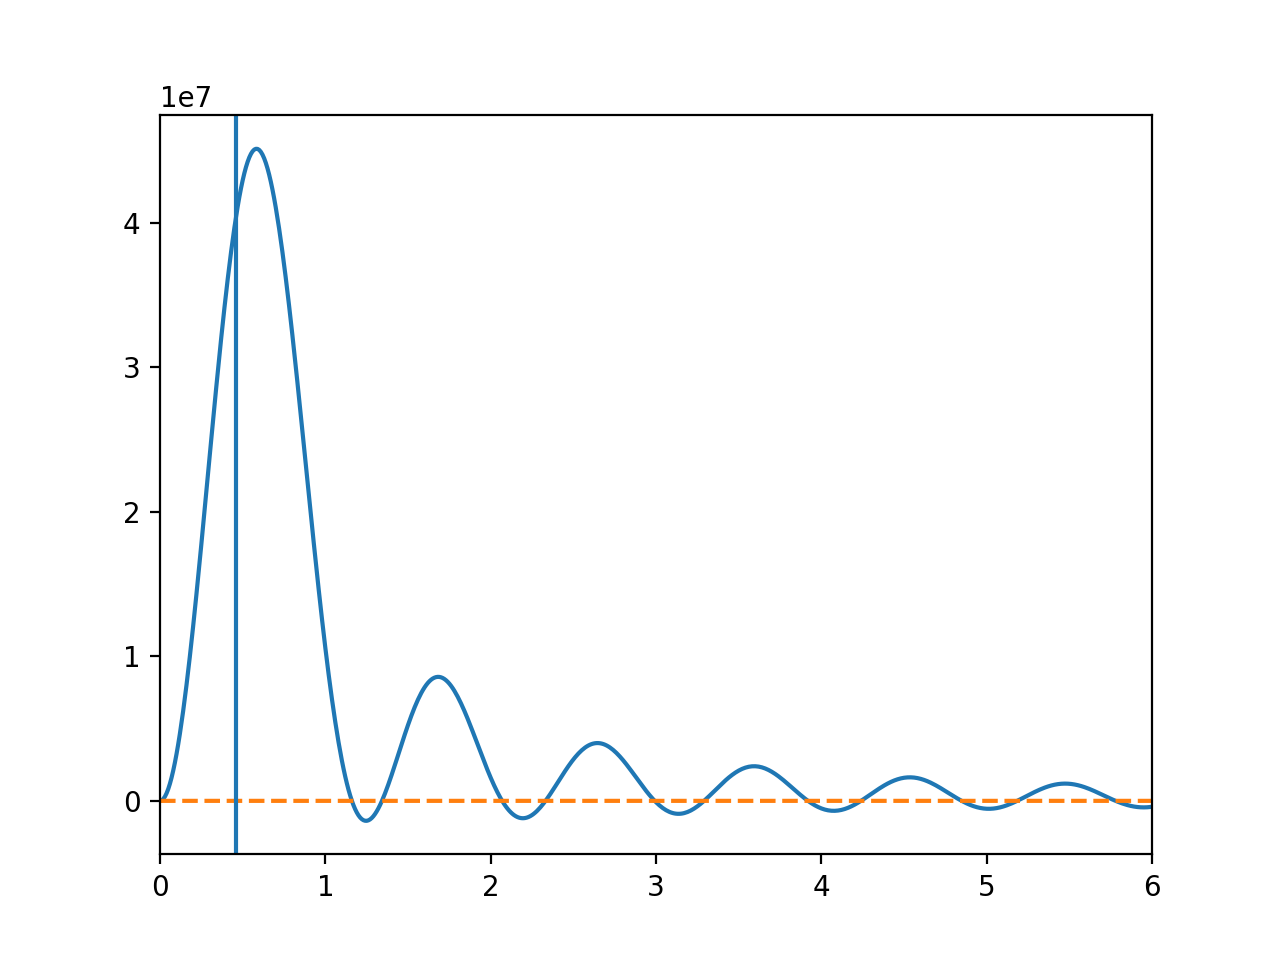

(0, 6.0)

In [192]:
figure()
plot(theta*180./pi,rad_ker*1e4)
plot(theta*180./pi,rad_ker*apow,"--")
axvline(pxsize*180./pi)
rad_ker=rad_ker*apow
xlim(0,1.5*theta_cutoff*180./pi)

In [193]:
ell=arange(lmax+1)
gl=rk.get_gl_from_gbeta(theta,rad_ker,pl2,theta_cutoff,lmax) ;# gl[0:2]=1
rec_rad_ker=rk.get_gbeta_from_gl(theta,gl,pl2)

<IPython.core.display.Javascript object>


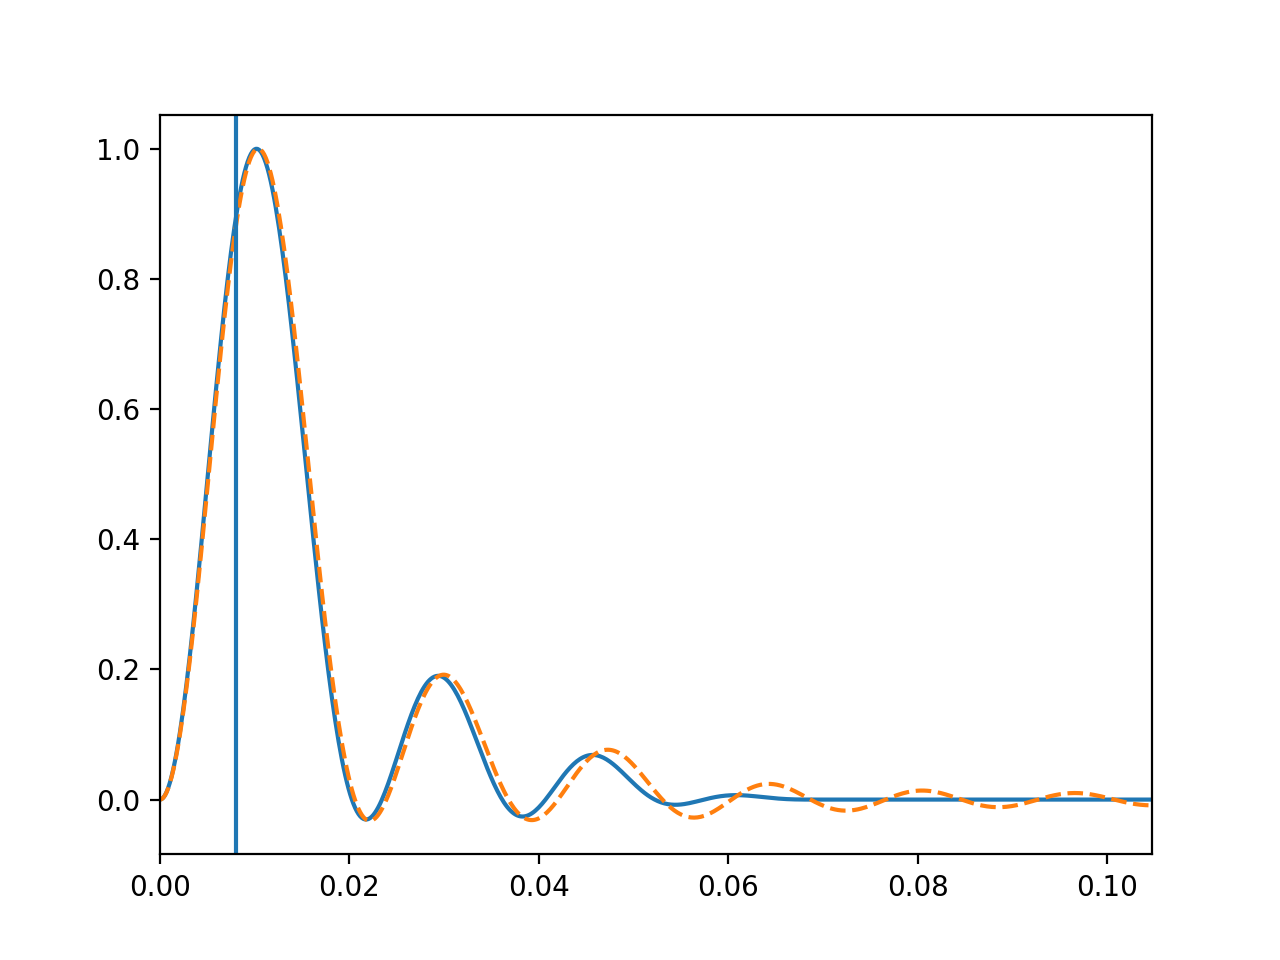

<IPython.core.display.Javascript object>


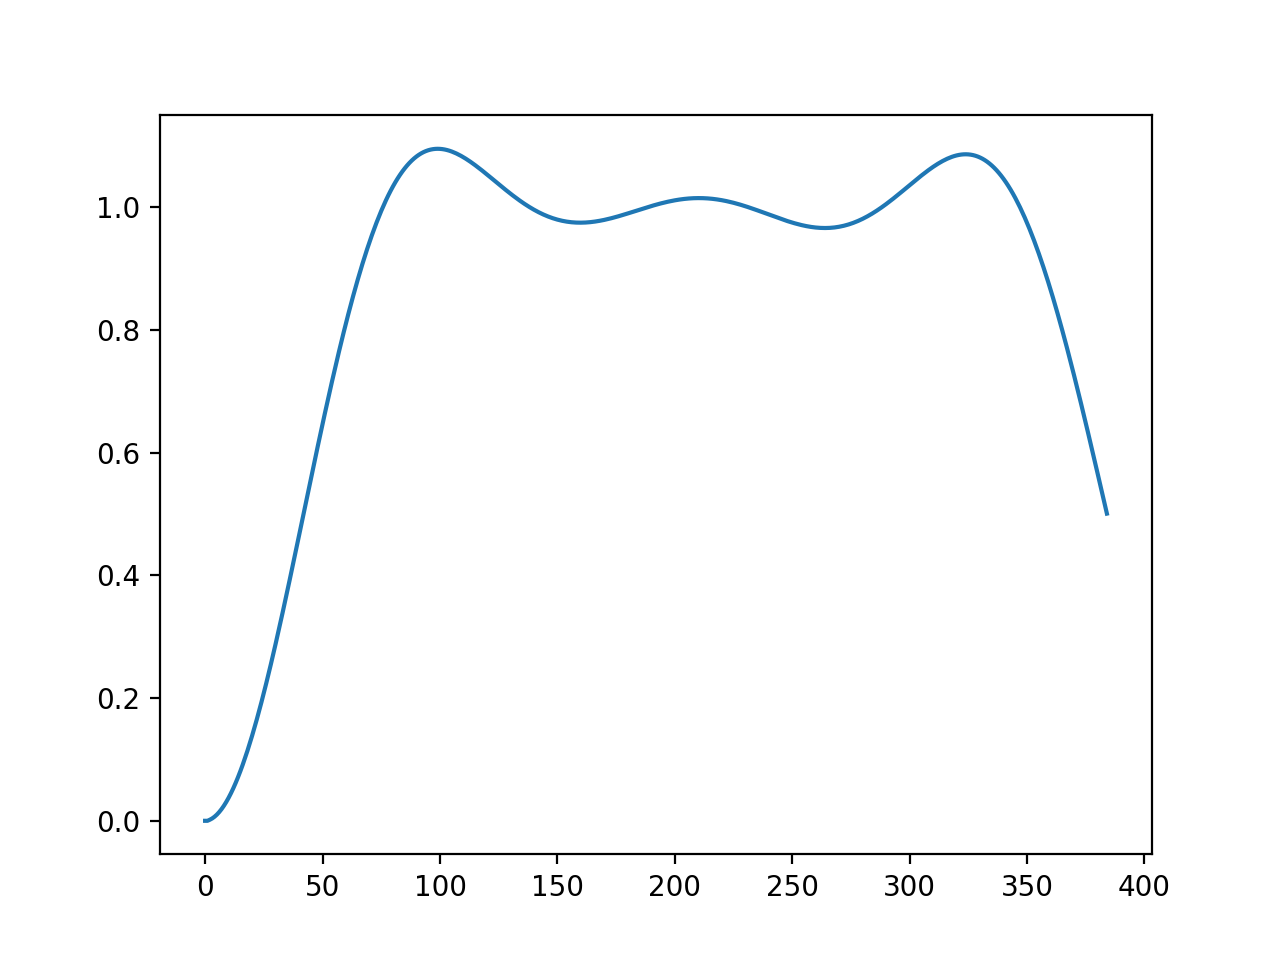

In [194]:
figure()
plot(theta,rad_ker/max(rad_ker))
plot(theta,rec_rad_ker/max(rec_rad_ker),"--")
axvline(pxsize)
xlim(0,1.5*theta_cutoff)

figure()
plot(ell,gl)

<IPython.core.display.Javascript object>


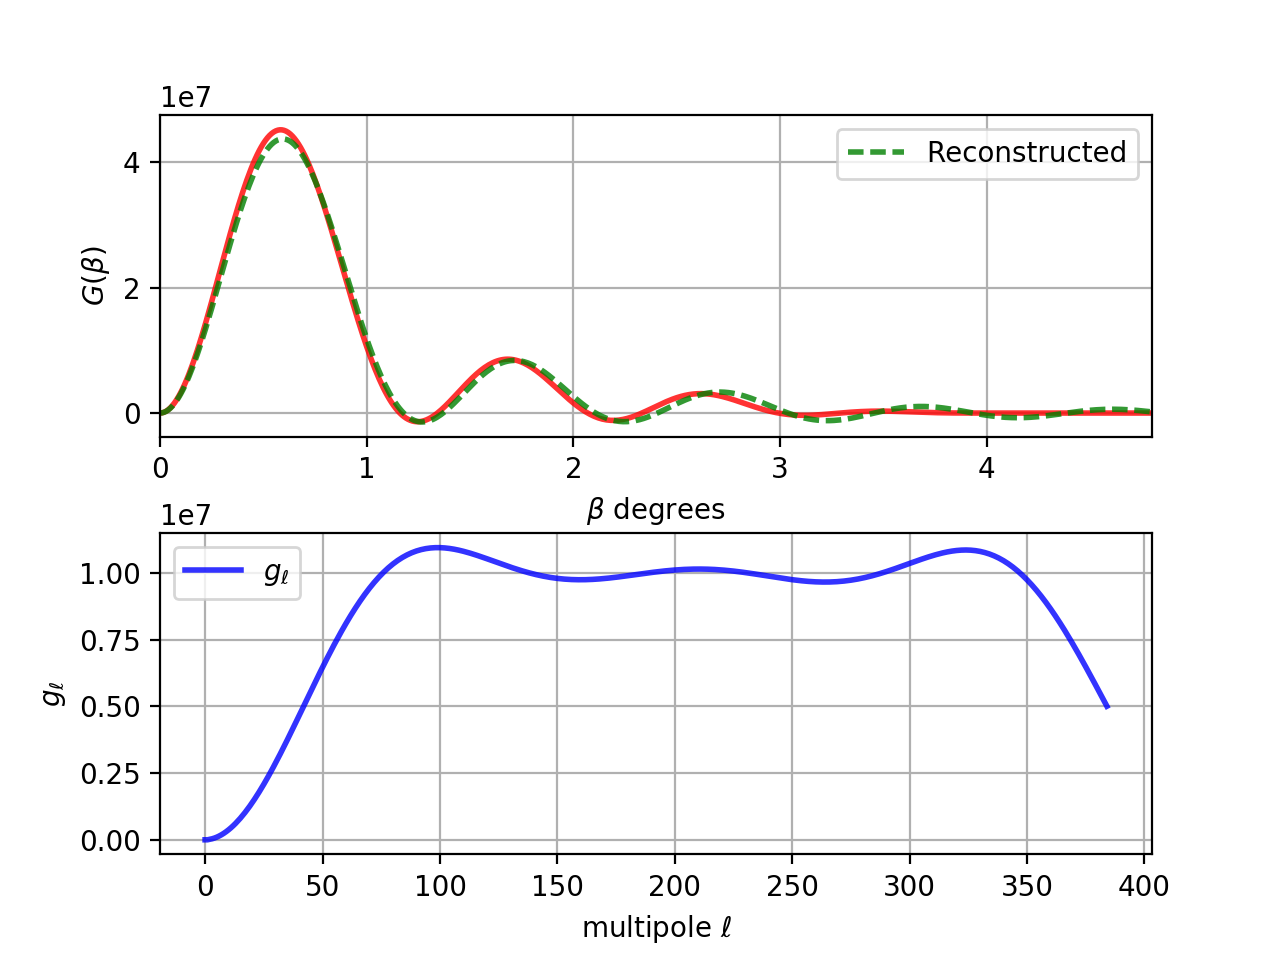

In [195]:
f, (ax1, ax2) = plt.subplots(2, sharex=False, sharey=False)
ax1.plot(theta*180./pi,rad_ker*1e4,"r-",lw=2,label="",alpha=0.8)
ax1.plot(theta*180./pi,rec_rad_ker*1e4,"g--",lw=2,label="Reconstructed",alpha=0.8)
ax1.grid()
ax1.legend(loc=0)
ax1.set_xlim(0,1.2*theta_cutoff*180./pi)
ax1.set_xlabel(r"$\beta$ degrees")
ax1.set_ylabel(r"$G(\beta)$")

ax2.plot(ell,gl*1e7,"b-",lw=2,label=r"$g_{\ell}$",alpha=0.8)
ax2.grid()
ax2.legend(loc=0)
ax2.set_xlabel(r"multipole $\ell$")
ax2.set_ylabel(r"$g_{\ell}$")
f.subplots_adjust(hspace=0.3)
savefig("../../figures/353ghz/default_rad_ker_spectral_response_rcutoff_4deg.pdf",dpi=300,bbox_inches="tight")

In [196]:
t1=time.time()
rteb=qb.convert_qu2eb_integrate_masked(tqu[1],tqu[2],theta_cutoff,theta,rad_ker)
print time.time()-t1

51.6882281303


<IPython.core.display.Javascript object>


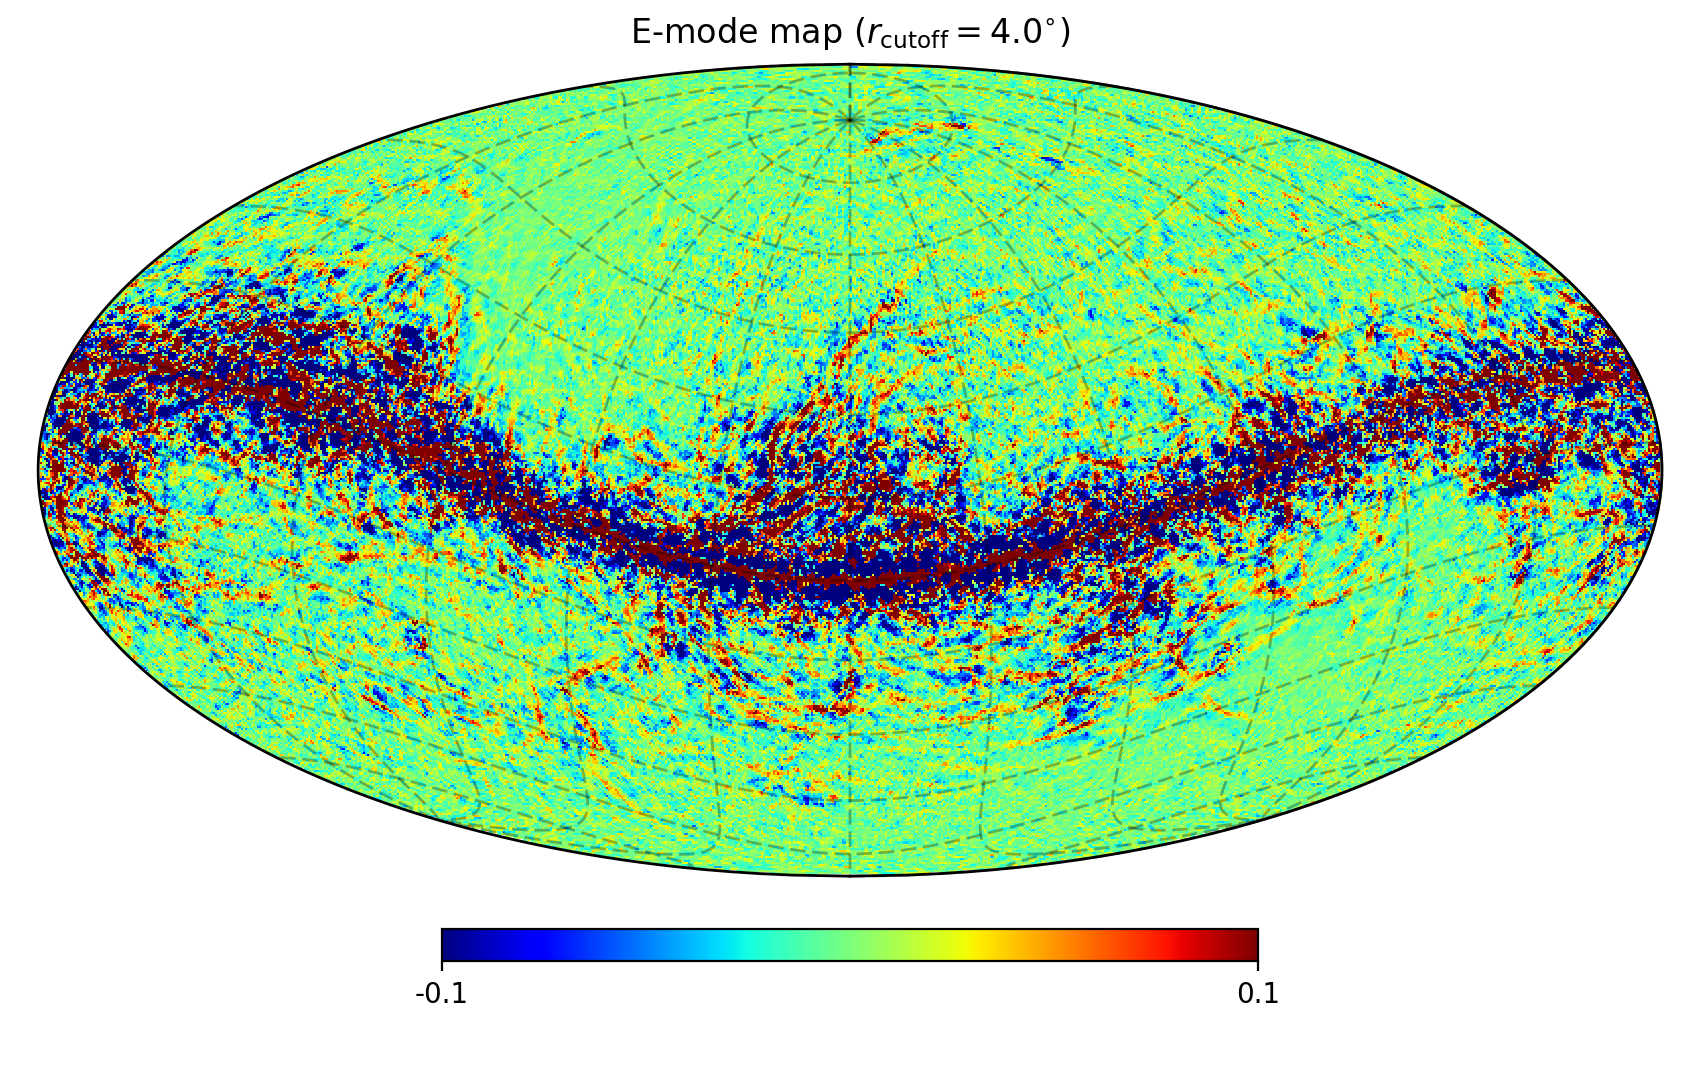

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<IPython.core.display.Javascript object>


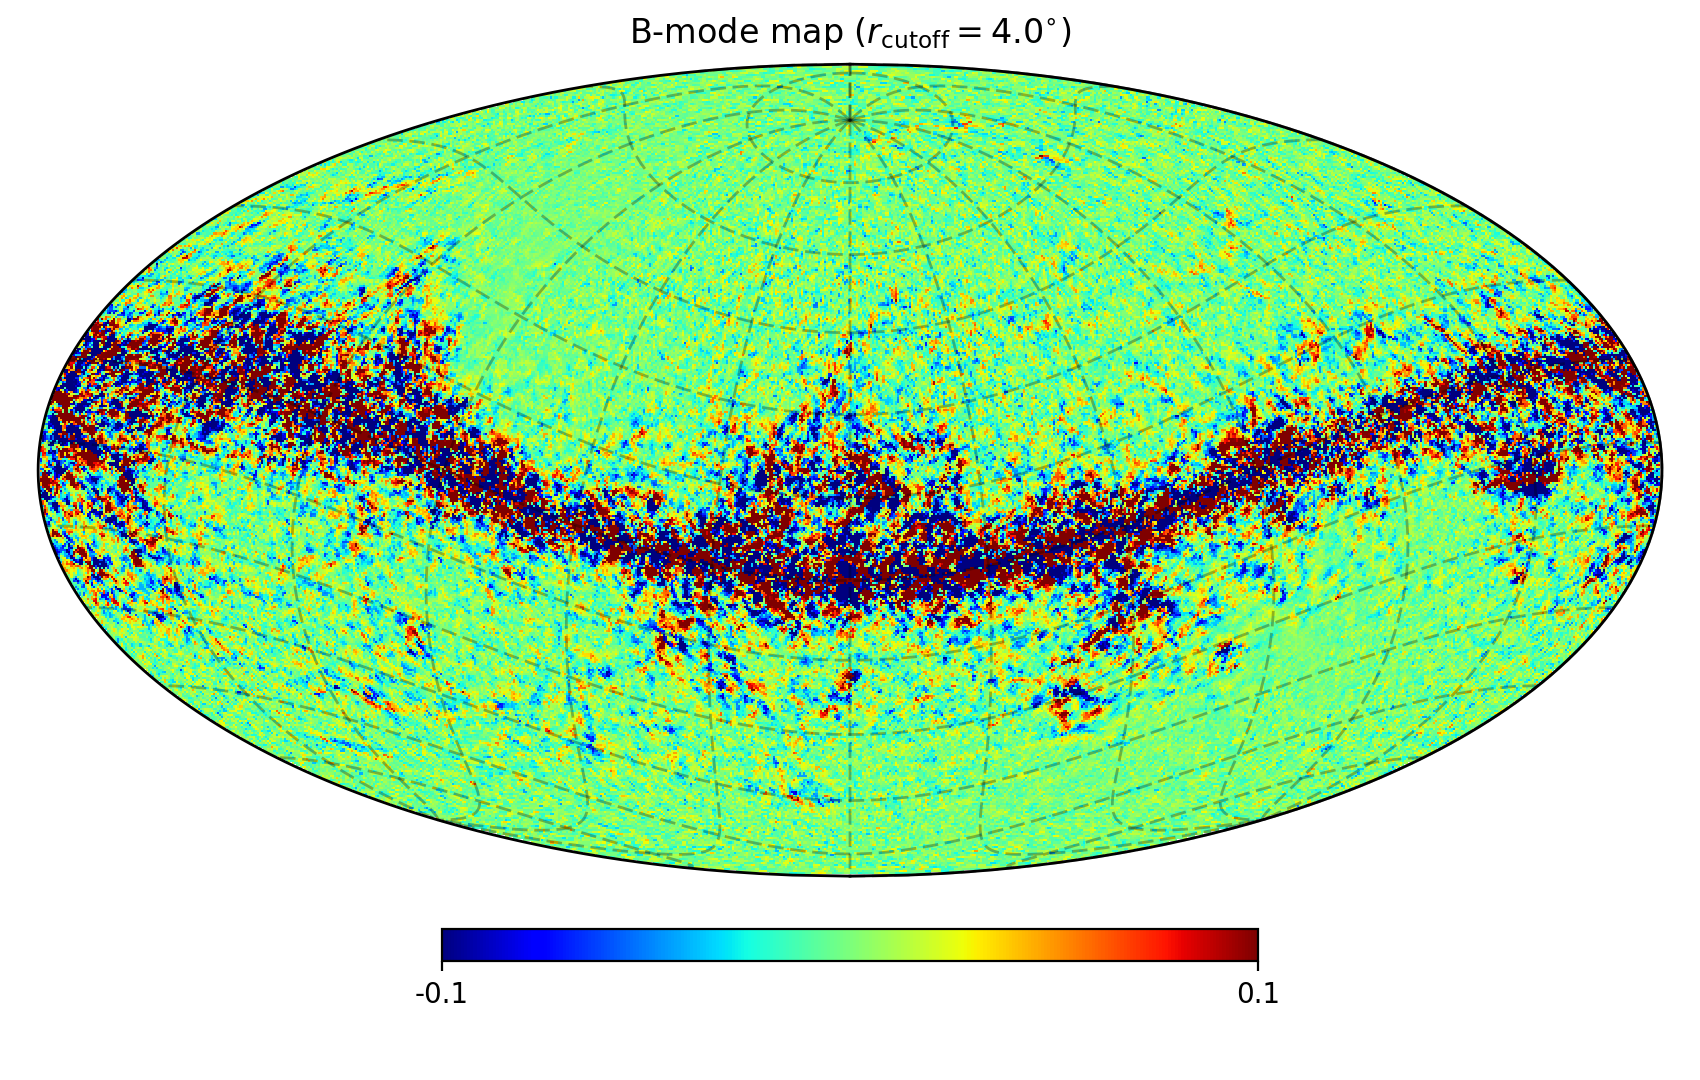

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [202]:
h.mollview(rteb[1]*1e-3,rot=(0,20),min=-0.1,max=0.1,title=r"E-mode map ($r_{\rm cutoff} = " + str(round(theta_cutoff*180./pi,2)) + "^{\circ}$)")
h.graticule(dpar=15,dmer=30,linestyle="dashed",alpha=0.3)
savefig("../../figures/353ghz/353-emode-rcutoff-default-rad-ker-4degrees.pdf",dpi=300,bbox_inches="tight")
h.mollview(rteb[2]*1e-3,min=-0.1,max=0.1,rot=(0,20),title=r"B-mode map ($r_{\rm cutoff} = " + str(round(theta_cutoff*180./pi,2)) + "^{\circ}$)")
h.graticule(dpar=15,dmer=30,linestyle="dashed",alpha=0.3)
savefig("../../figures/353ghz/353-bmode-rcutoff-default-rad-ker-4degrees.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


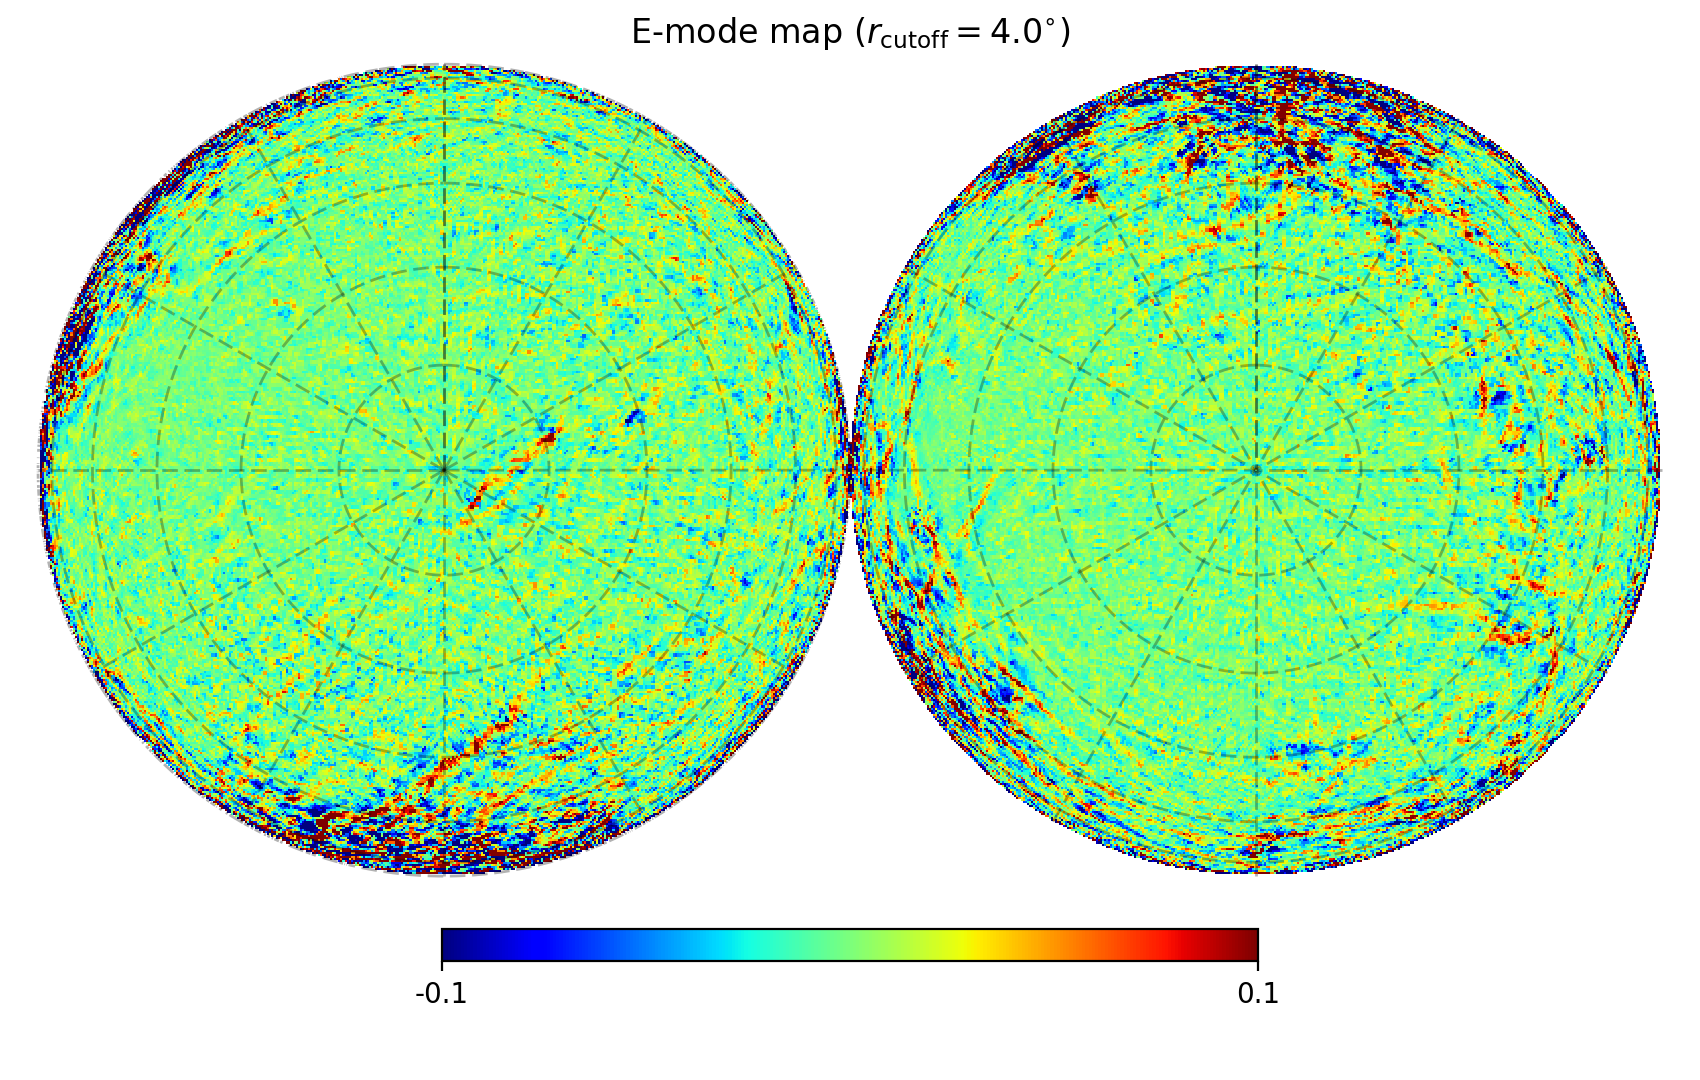

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<IPython.core.display.Javascript object>


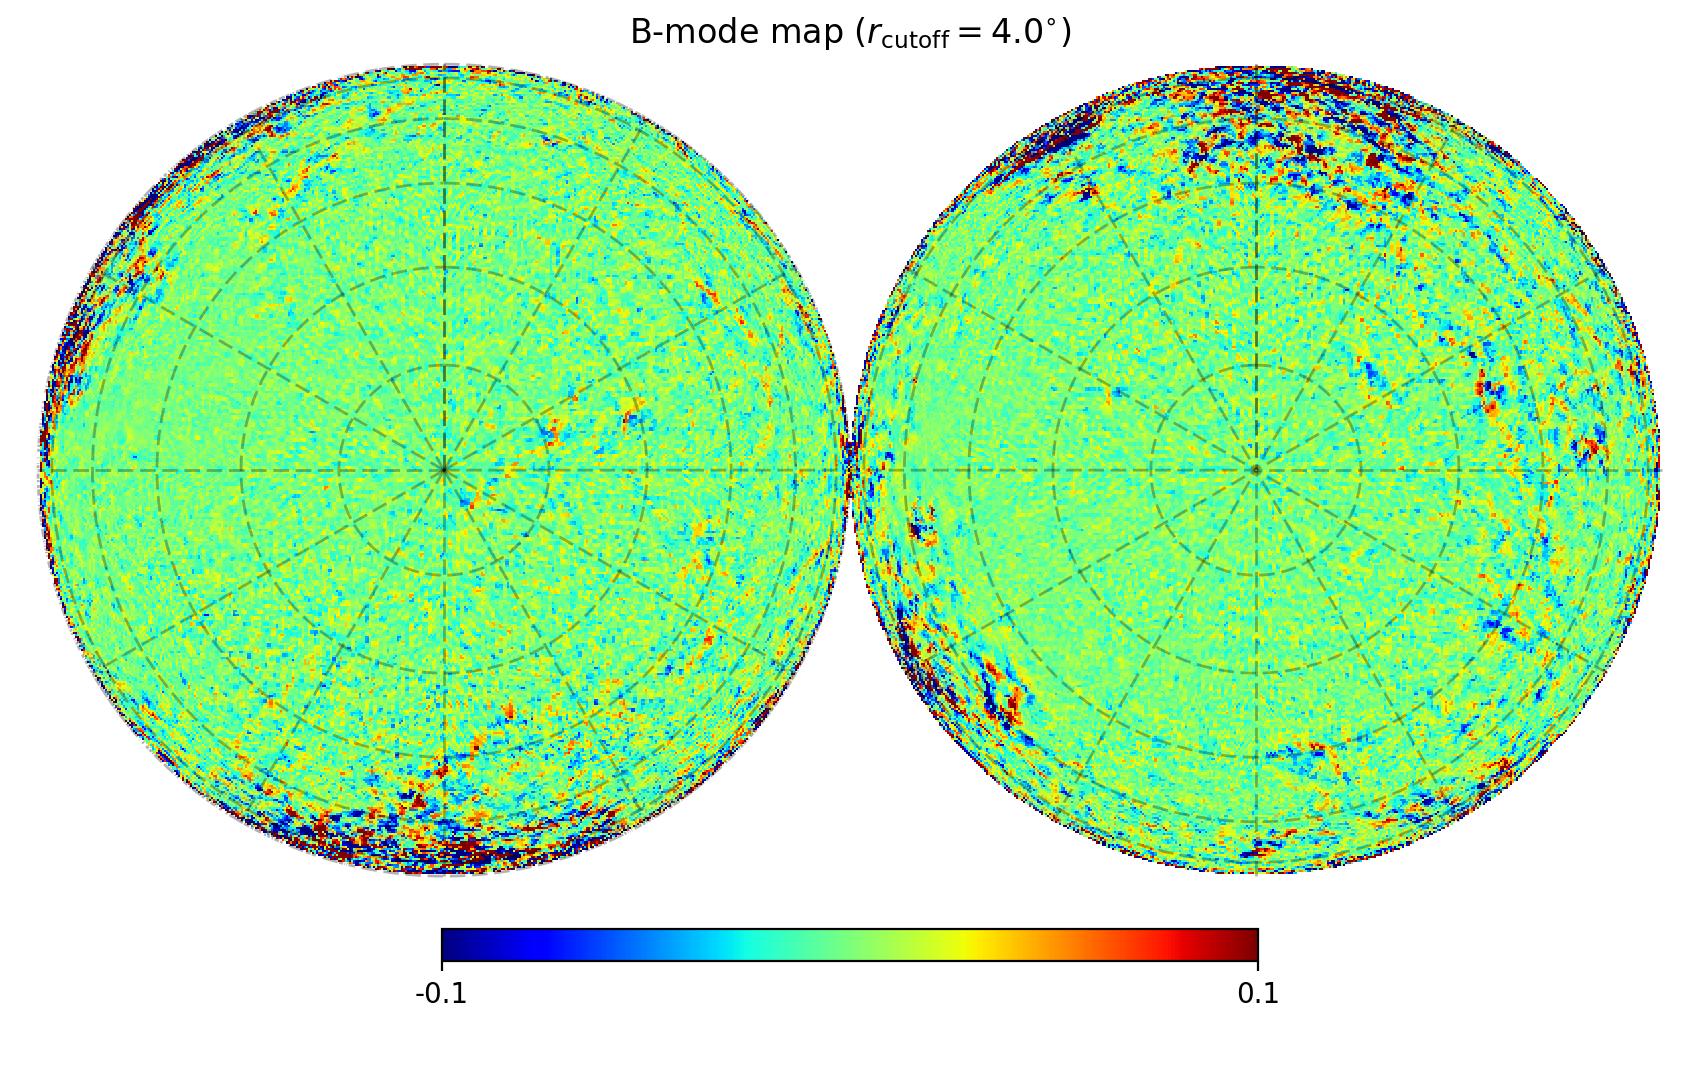

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [203]:
h.orthview(rteb[1]*1e-3,min=-0.1,max=0.1,rot=(0,90),title=r"E-mode map ($r_{\rm cutoff} = " + str(round(theta_cutoff*180./pi,2)) + "^{\circ}$)")
h.graticule(dpar=15,dmer=30,linestyle="dashed",alpha=0.3)
savefig("../../figures/353ghz/353-emode-rcutoff-default-rad-ker-4degrees_orth.pdf",dpi=300,bbox_inches="tight")
h.orthview(rteb[2]*1e-3,min=-0.1,max=0.1,rot=(0,90),title=r"B-mode map ($r_{\rm cutoff} = " + str(round(theta_cutoff*180./pi,2)) + "^{\circ}$)")
h.graticule(dpar=15,dmer=30,linestyle="dashed",alpha=0.3)
savefig("../../figures/353ghz/353-bmode-rcutoff-default-rad-ker-4degrees_orth.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


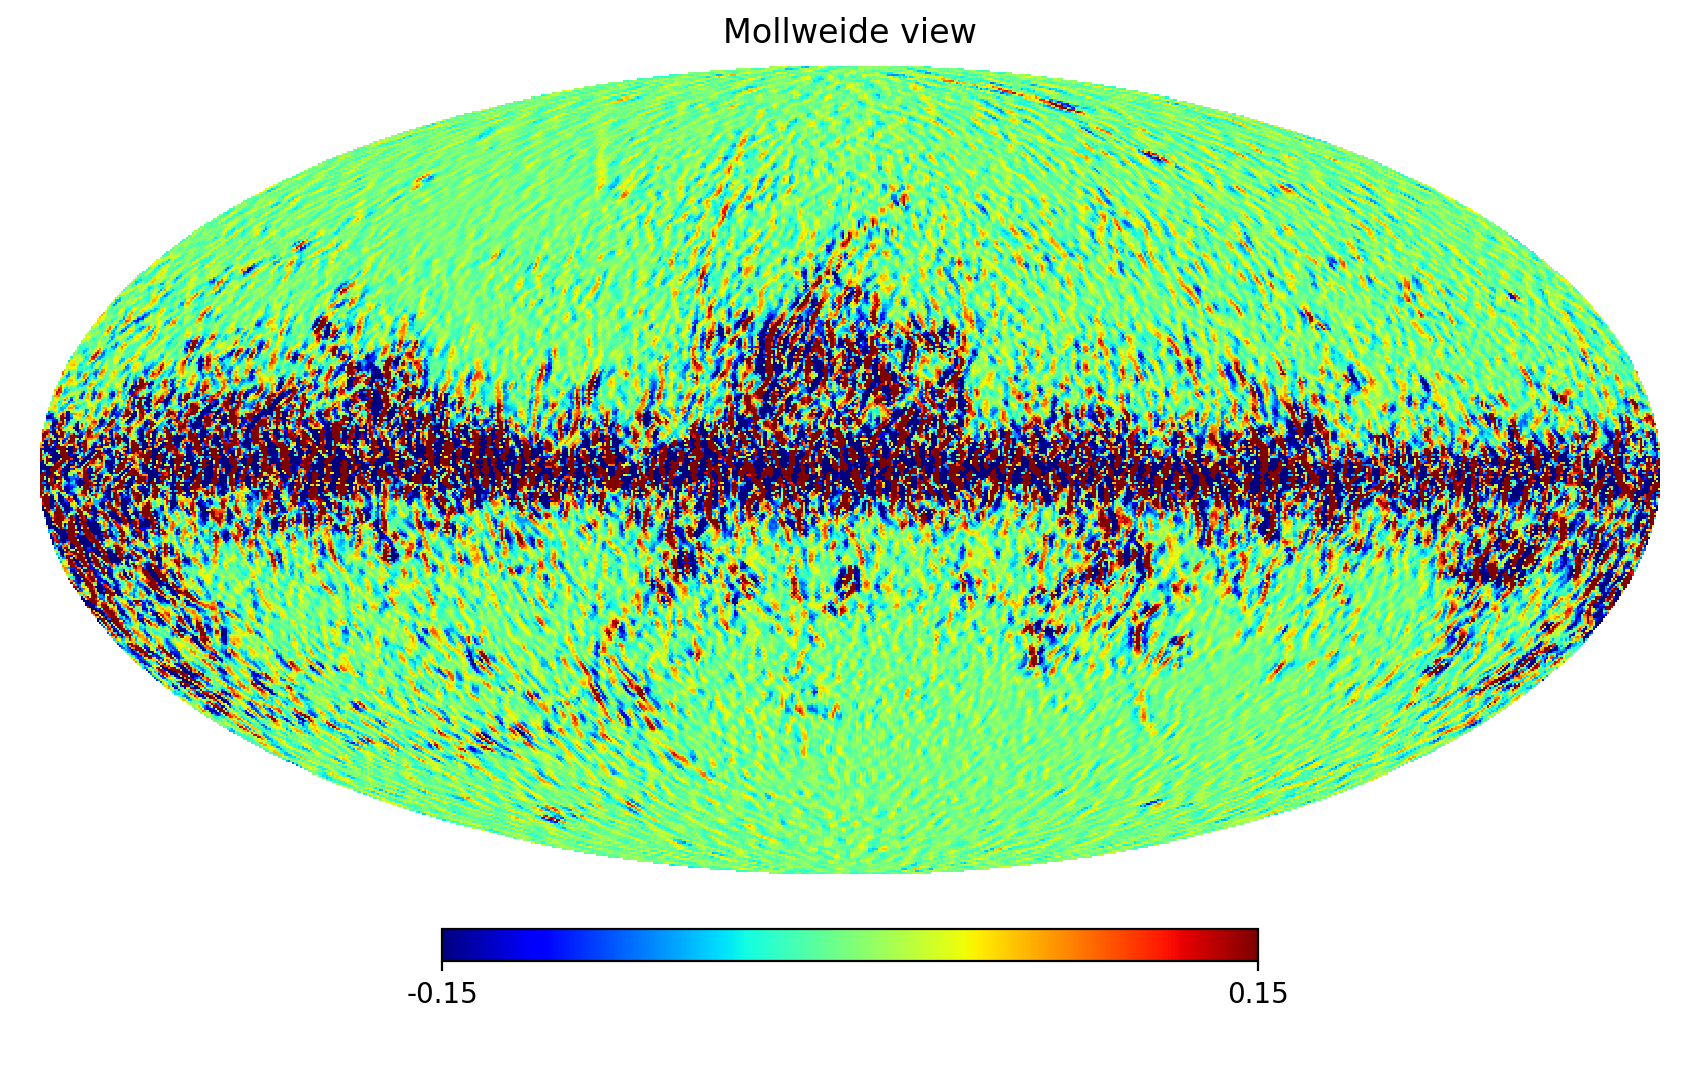

In [79]:
h.mollview((rteb[1]-hteb[1])*1e4,min=-0.15,max=0.15)

In [75]:
alm=h.map2alm(tqu,pol=True,lmax=lmax)
alm=(alm[0],h.almxfl(alm[1],gl,inplace=True),h.almxfl(alm[2],gl,inplace=True))

In [76]:
hteb=h.alm2map(alm,nside)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


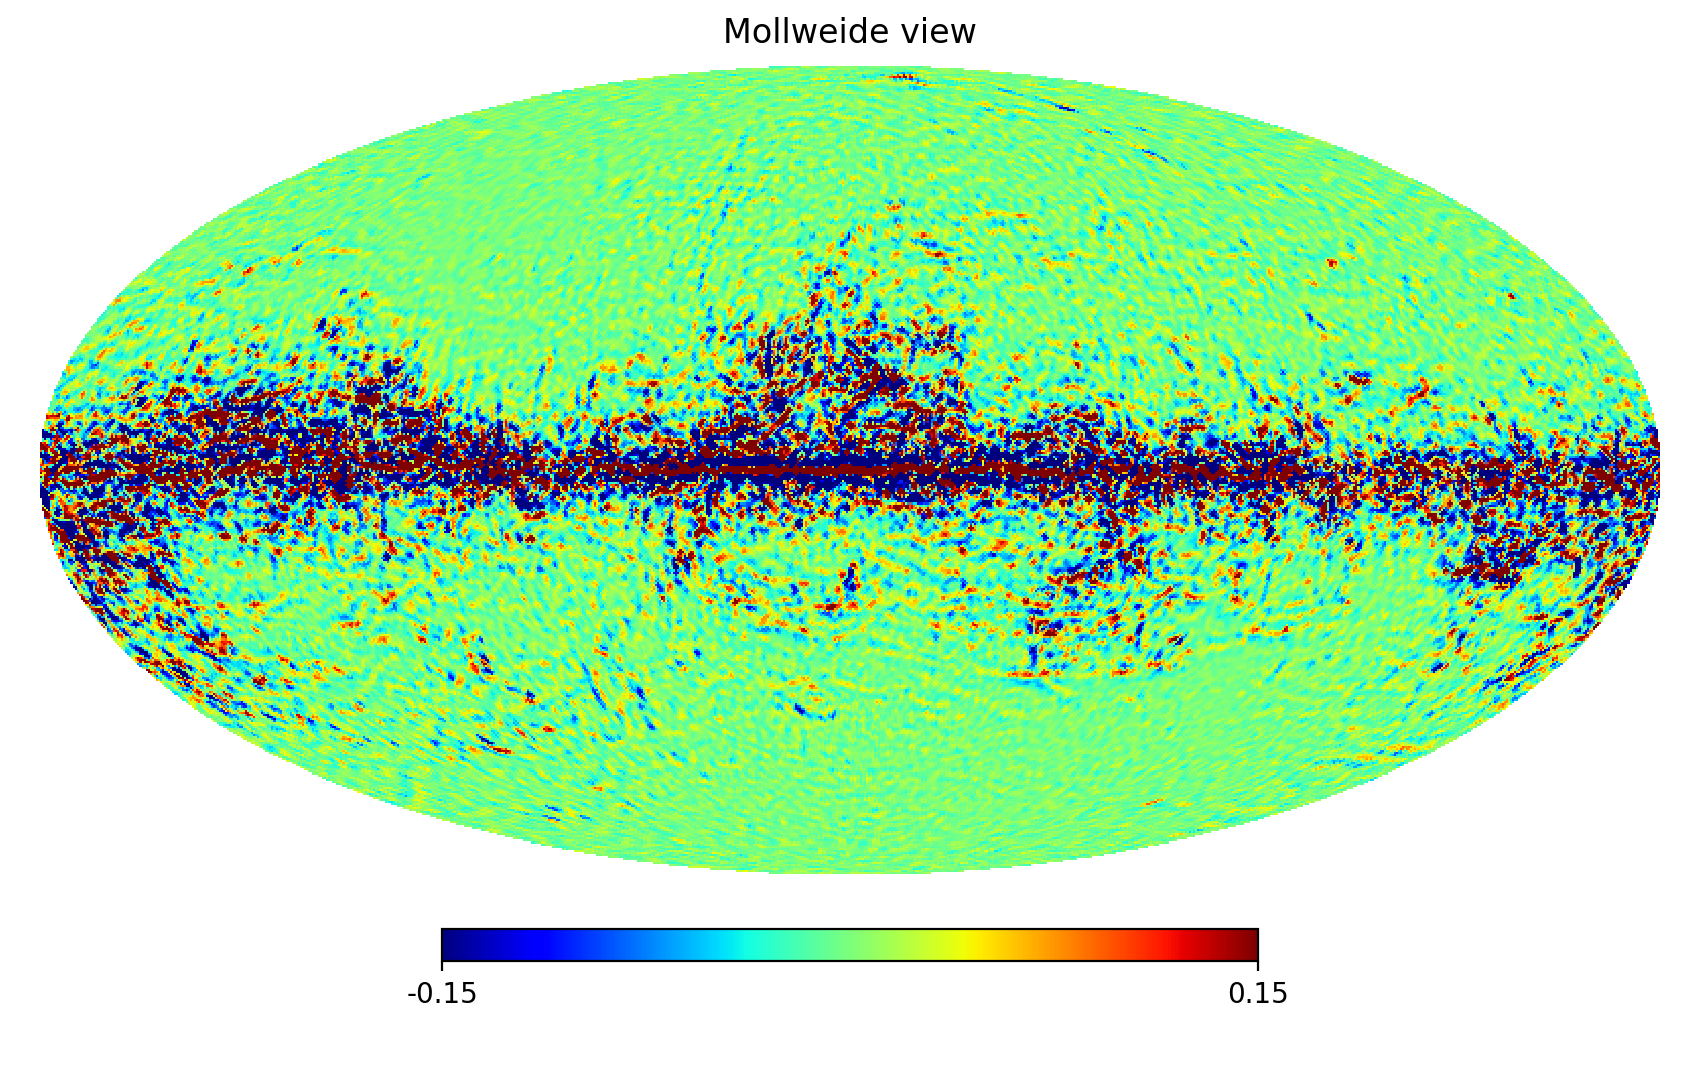

In [78]:
h.mollview(hteb[1]*1e4,min=-0.15,max=0.15)